## Table of Contents

- [Lab_Cleaning numerical data](#Lab_Cleaning-numerical-data)
- [Lab_Cleaning categorical data](#Lab_Cleaning-categorical-data)
- [Lab_Comparing regression models](#Lab_Comparing-regression-models)

# Lab_Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

1.- Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**2.- Load the customer_value_analysis.csv into the variable customer_df.**

In [2]:
# Explore the dataset

customer_df = pd.read_csv('/Users/marina/Documents/Marina/Bootcamp/Week_4/Day_1/Morning/lab-cleaning-numerical-data/files_for_lab/customer_value_analysis.csv')

**3.- First look at its main features (head, shape, info).**

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

**4.- Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)**

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
customer_df.columns = customer_df.columns.str.lower()

In [8]:
customer_df = customer_df.rename(columns=lambda x: x.replace(' ', '_'))
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**5.- Change the type of effective_to_date column to DateTime format.**

In [9]:
customer_df["effective_to_date"] = customer_df["effective_to_date"].apply(pd.to_datetime)

In [10]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
customer_df["effective_to_date"].value_counts

<bound method IndexOpsMixin.value_counts of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]>

**6.- Check NaN values per column.**

In [12]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

**7.- Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.**

In [13]:
"""function that given an input dataframe, returns two dataframes: 
one with numerical columns 
and another with categorical columns of the input dataframe"""

# numerical columns
numericals = customer_df.select_dtypes(np.number)
display(numericals.shape)
numericals.head()

(9134, 8)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [14]:
#categorical columns
categoricals = customer_df.select_dtypes("object")
display(categoricals.shape)
categoricals.head()

(9134, 15)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


**8.- Drop any ID column.**

In [15]:
categoricals.drop(['customer'], axis=1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


**9.- Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?**

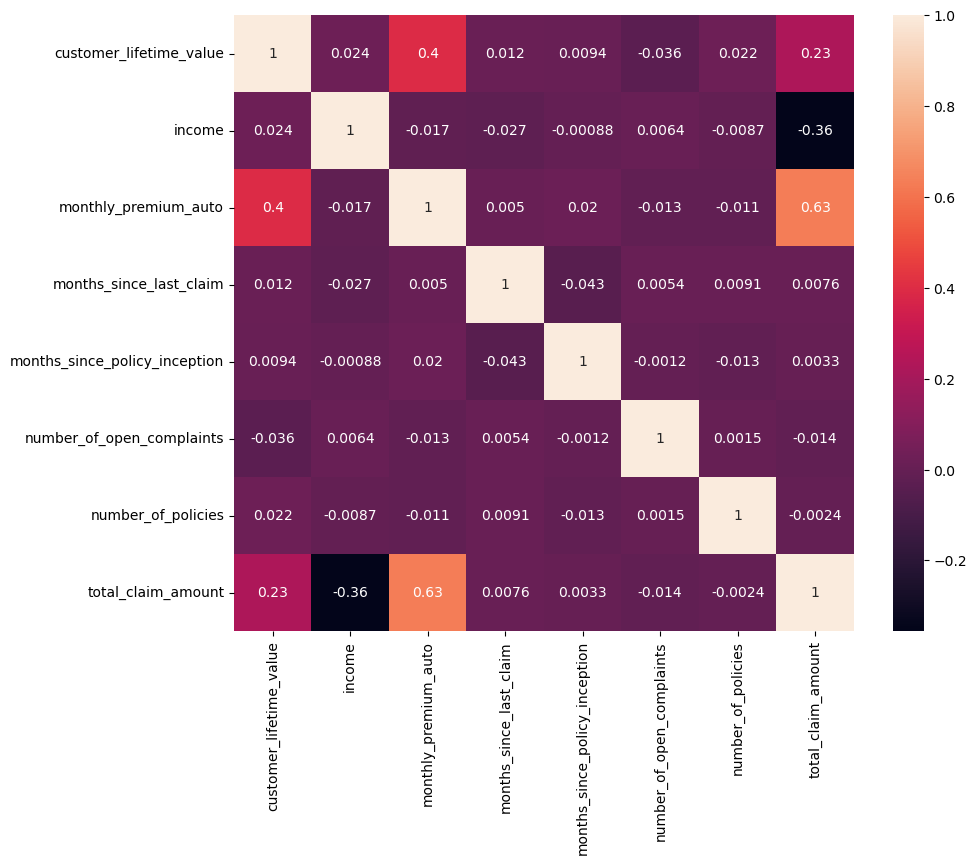

In [16]:
corr_matrix=numericals.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

    What is the pair of numerical variables that have the highest correlation
The pair of columns that have a highest correlation are monthly_premium_auto and total_claim_amount, 0.63
It make sense because the premium autos are used to take more risks, so it is logical that the "total_claim_auto" is higher.

**10.- Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames:** 
- the first containing numerical continuous columns 
- and the second containing numerical discrete columns of the input dataframe.

**To this end, it might be helpful to count the number of unique values**

**The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.**

In [17]:
discrete_df = pd.DataFrame()
continuous_df = pd.DataFrame()

for col in customer_df.select_dtypes(include="number").columns:
    if customer_df[col].nunique() <= 36:
        discrete_df[col] = customer_df[col]
    else:
        continuous_df[col] = customer_df[col]

In [18]:
discrete_df.head()

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [19]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


**11.- Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).**

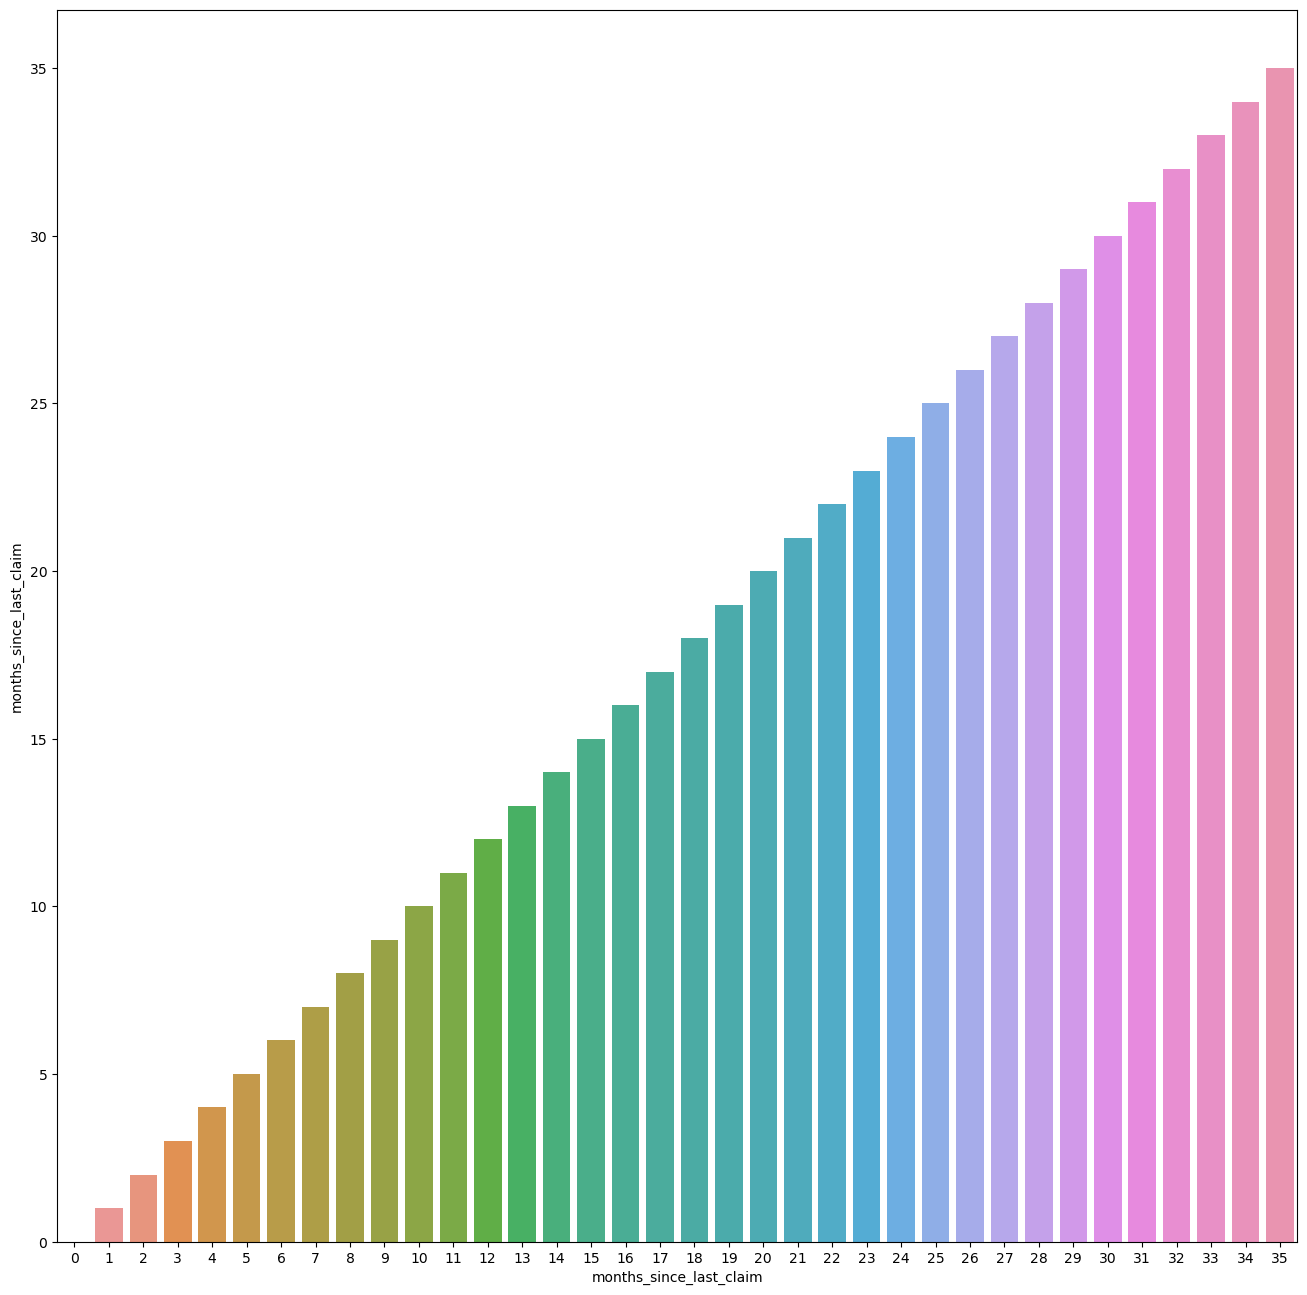

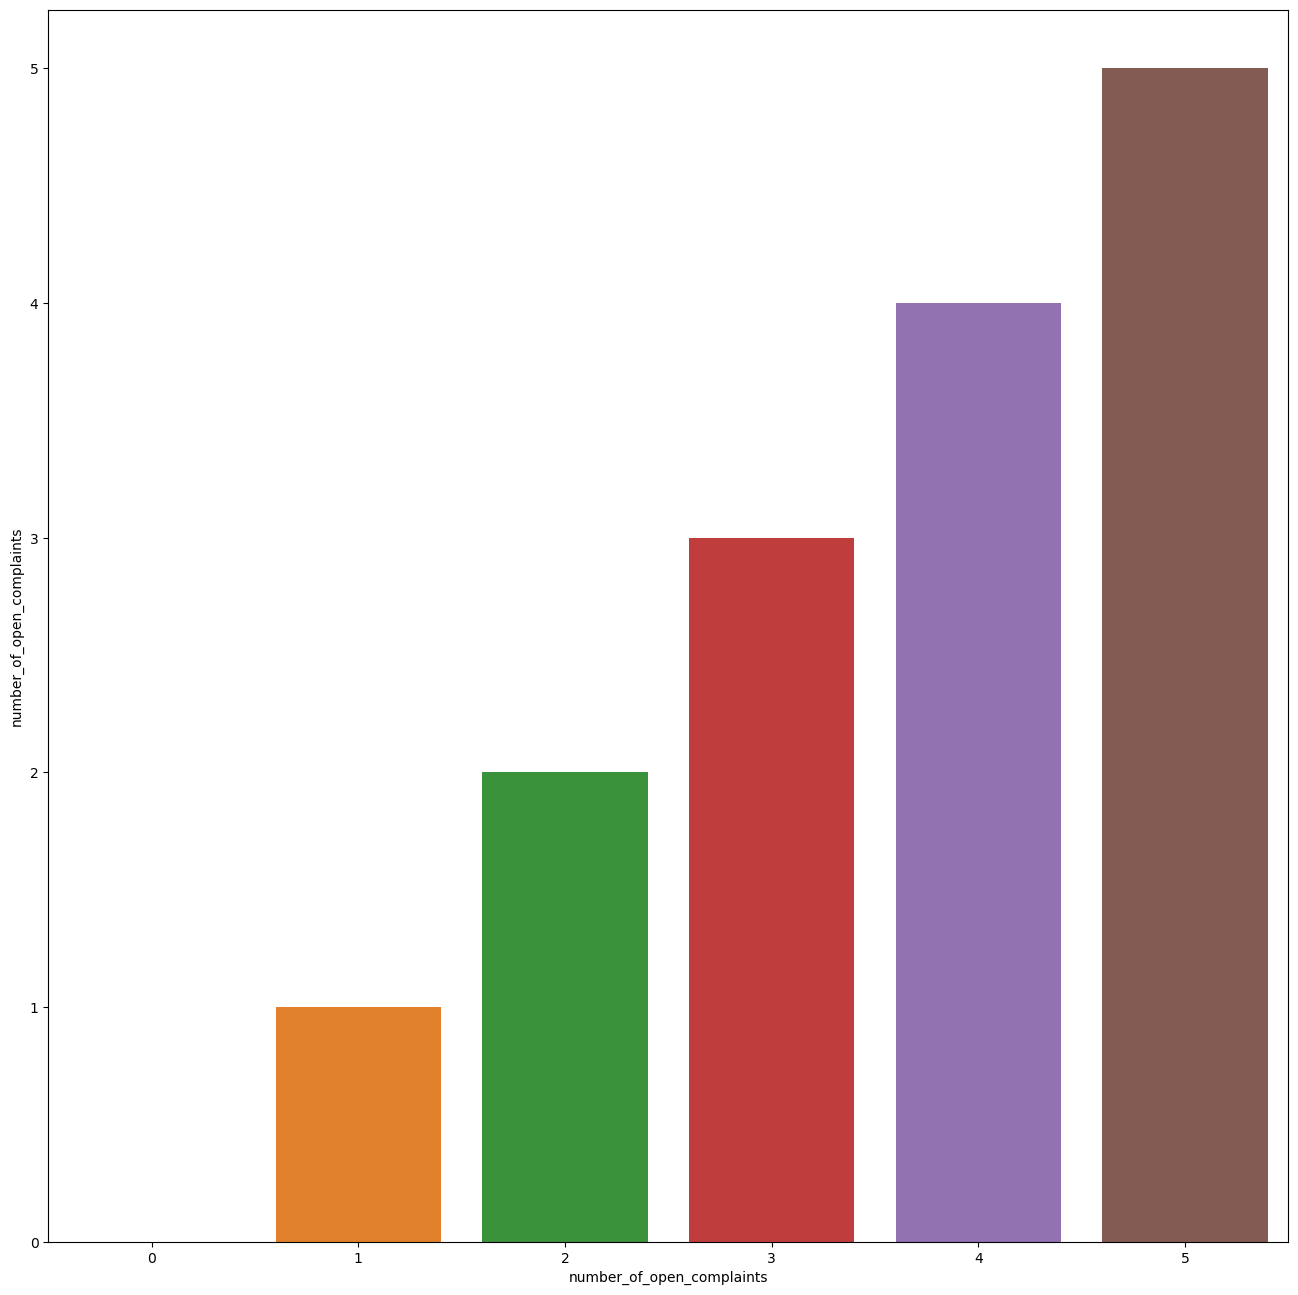

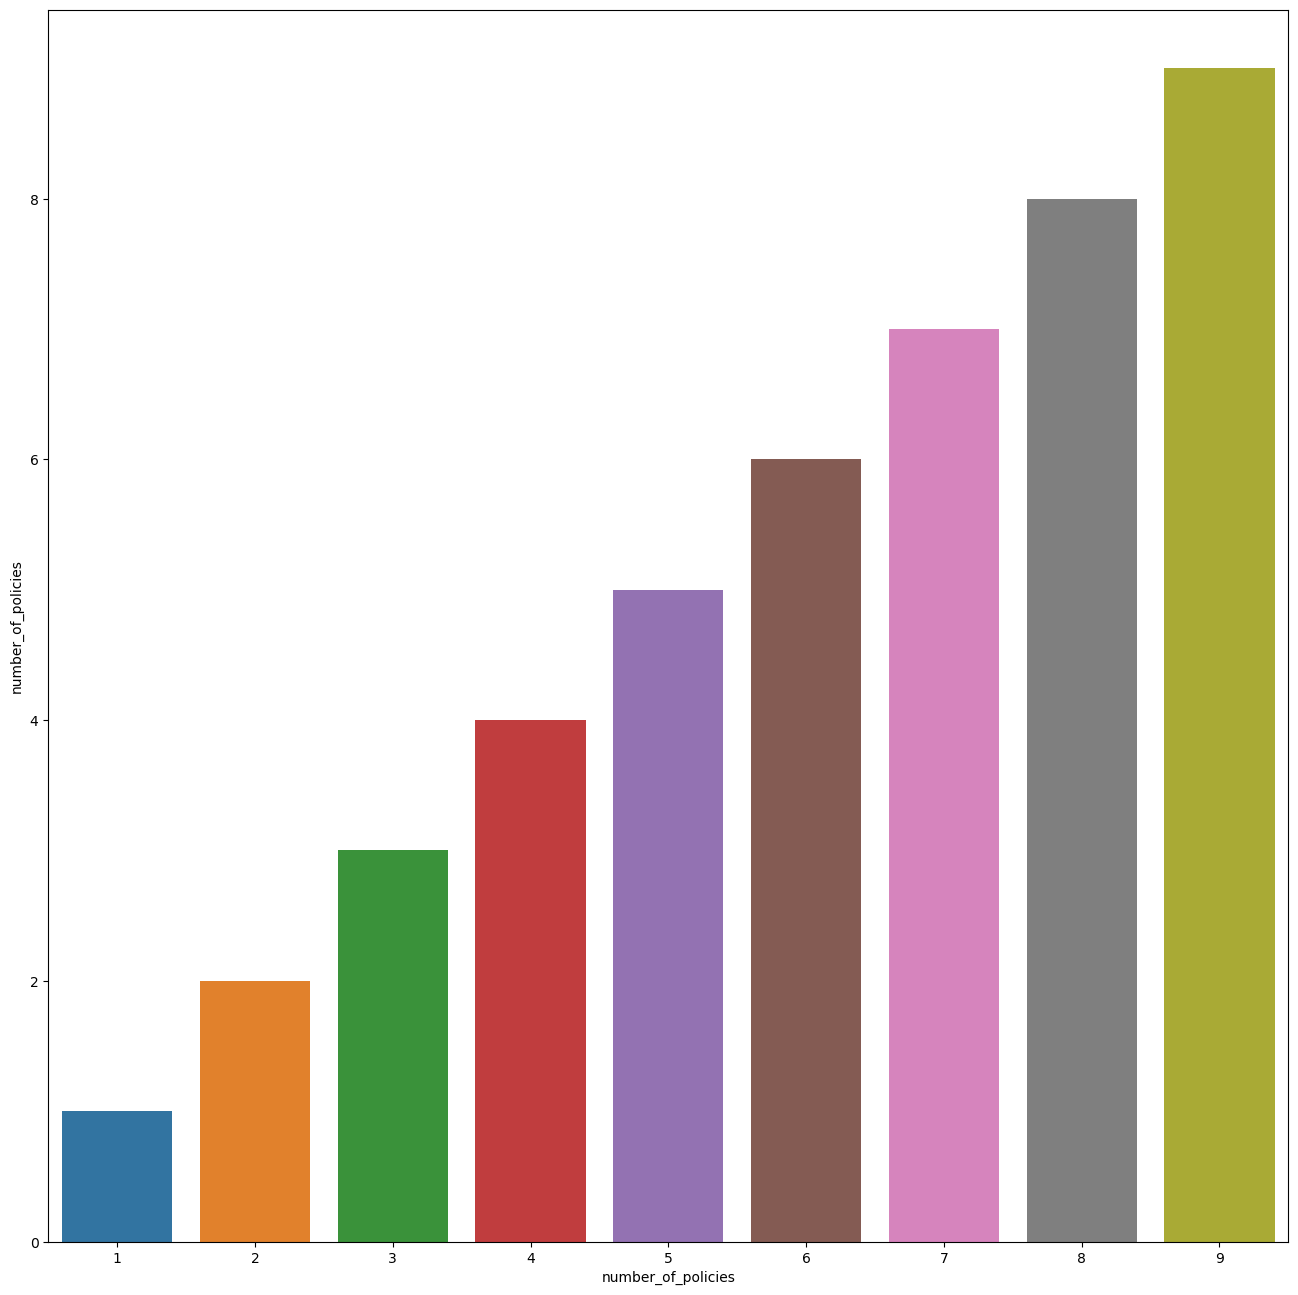

In [20]:
for column in discrete_df.columns:
    fig, (ax_plot) = plt.subplots(1, sharey=True, sharex=True, figsize=(16,16)) 
    sns.barplot(discrete_df, x=column, y=column)
    plt.show()

**12.- Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)**

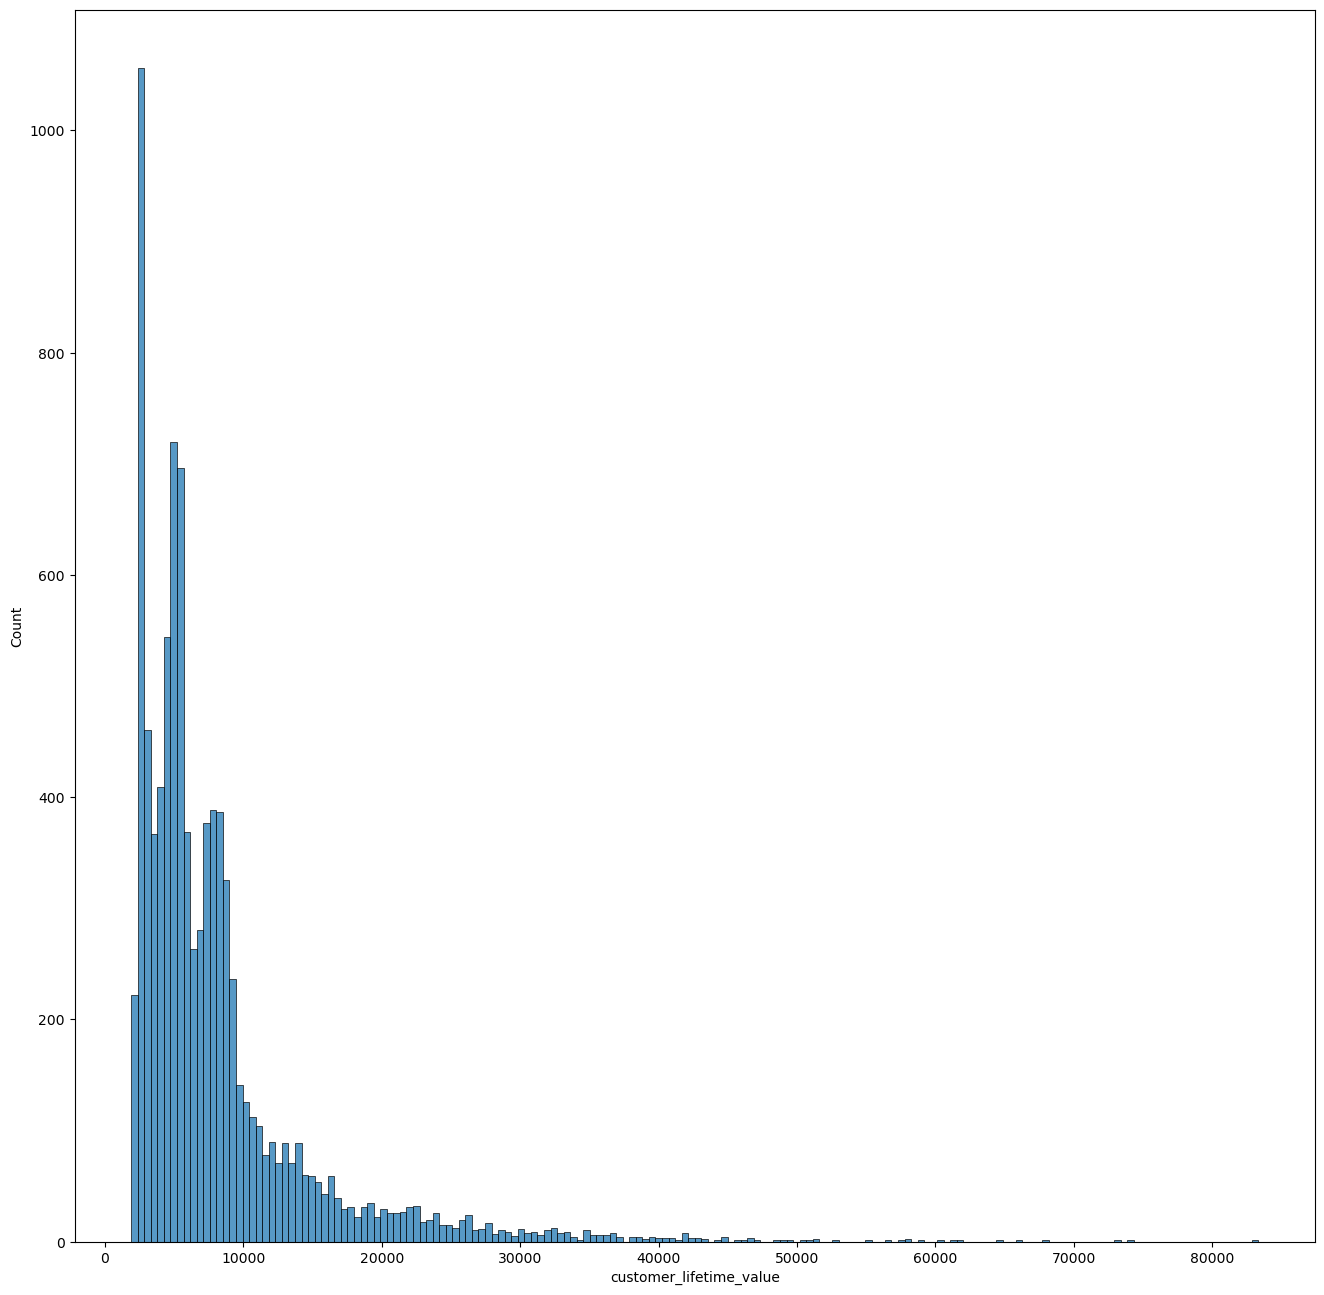

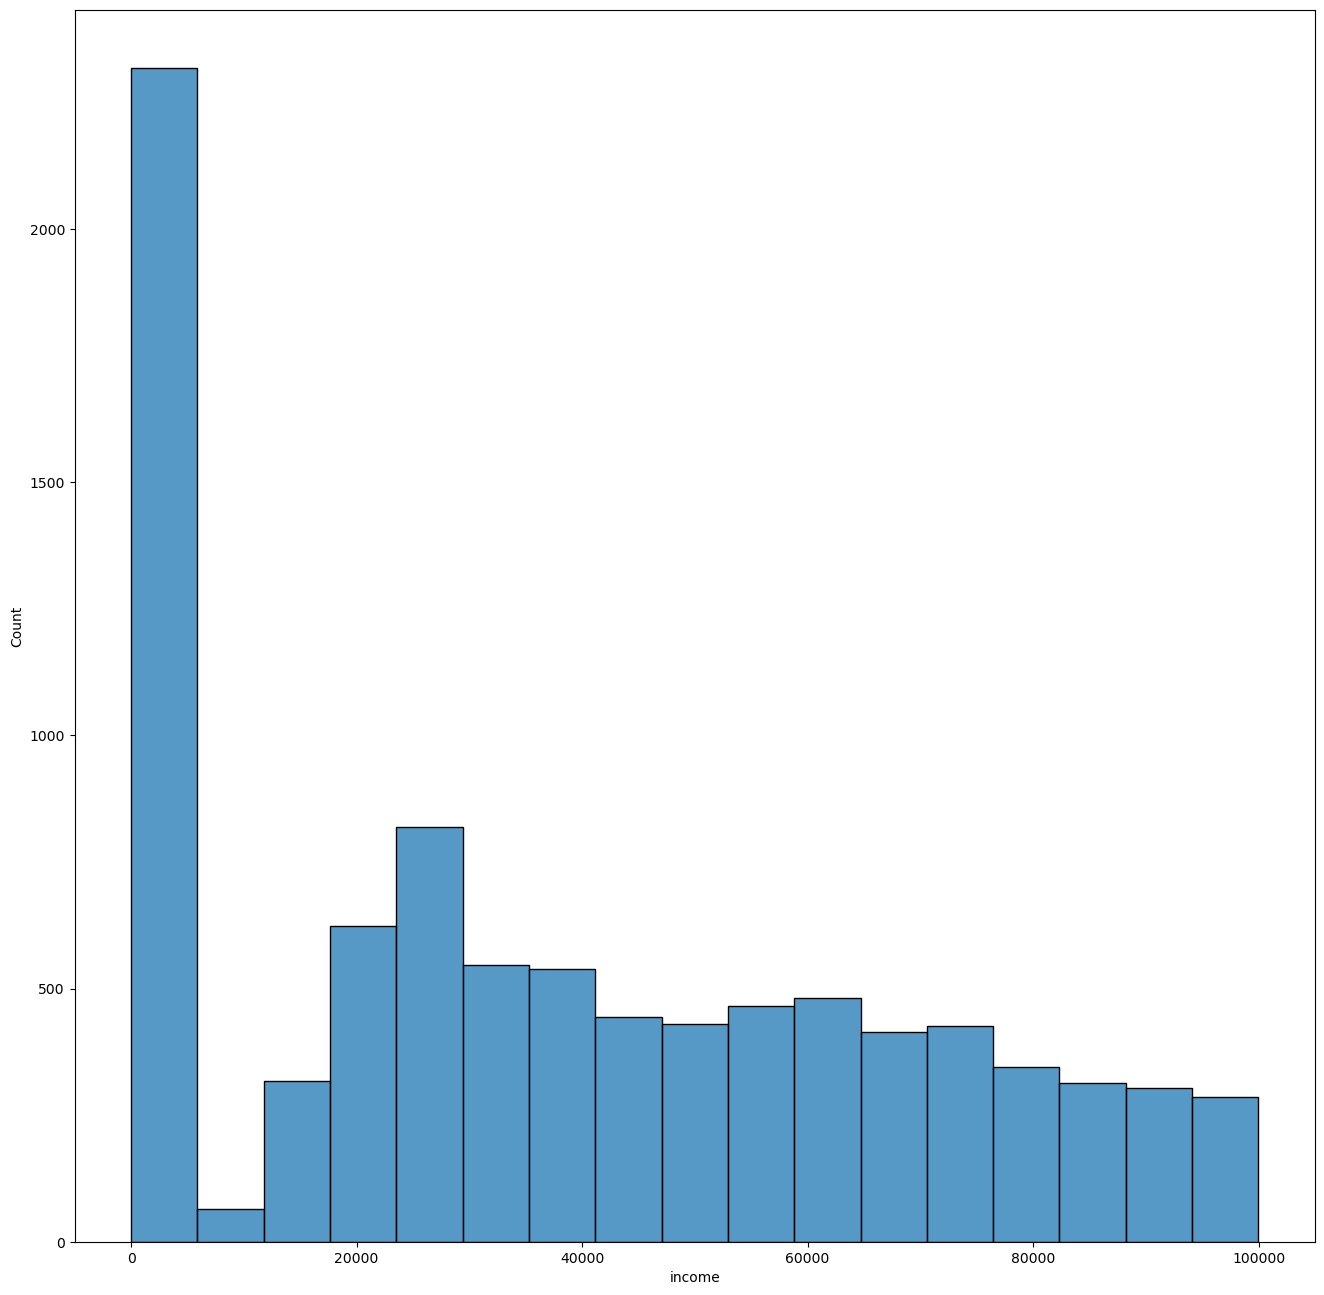

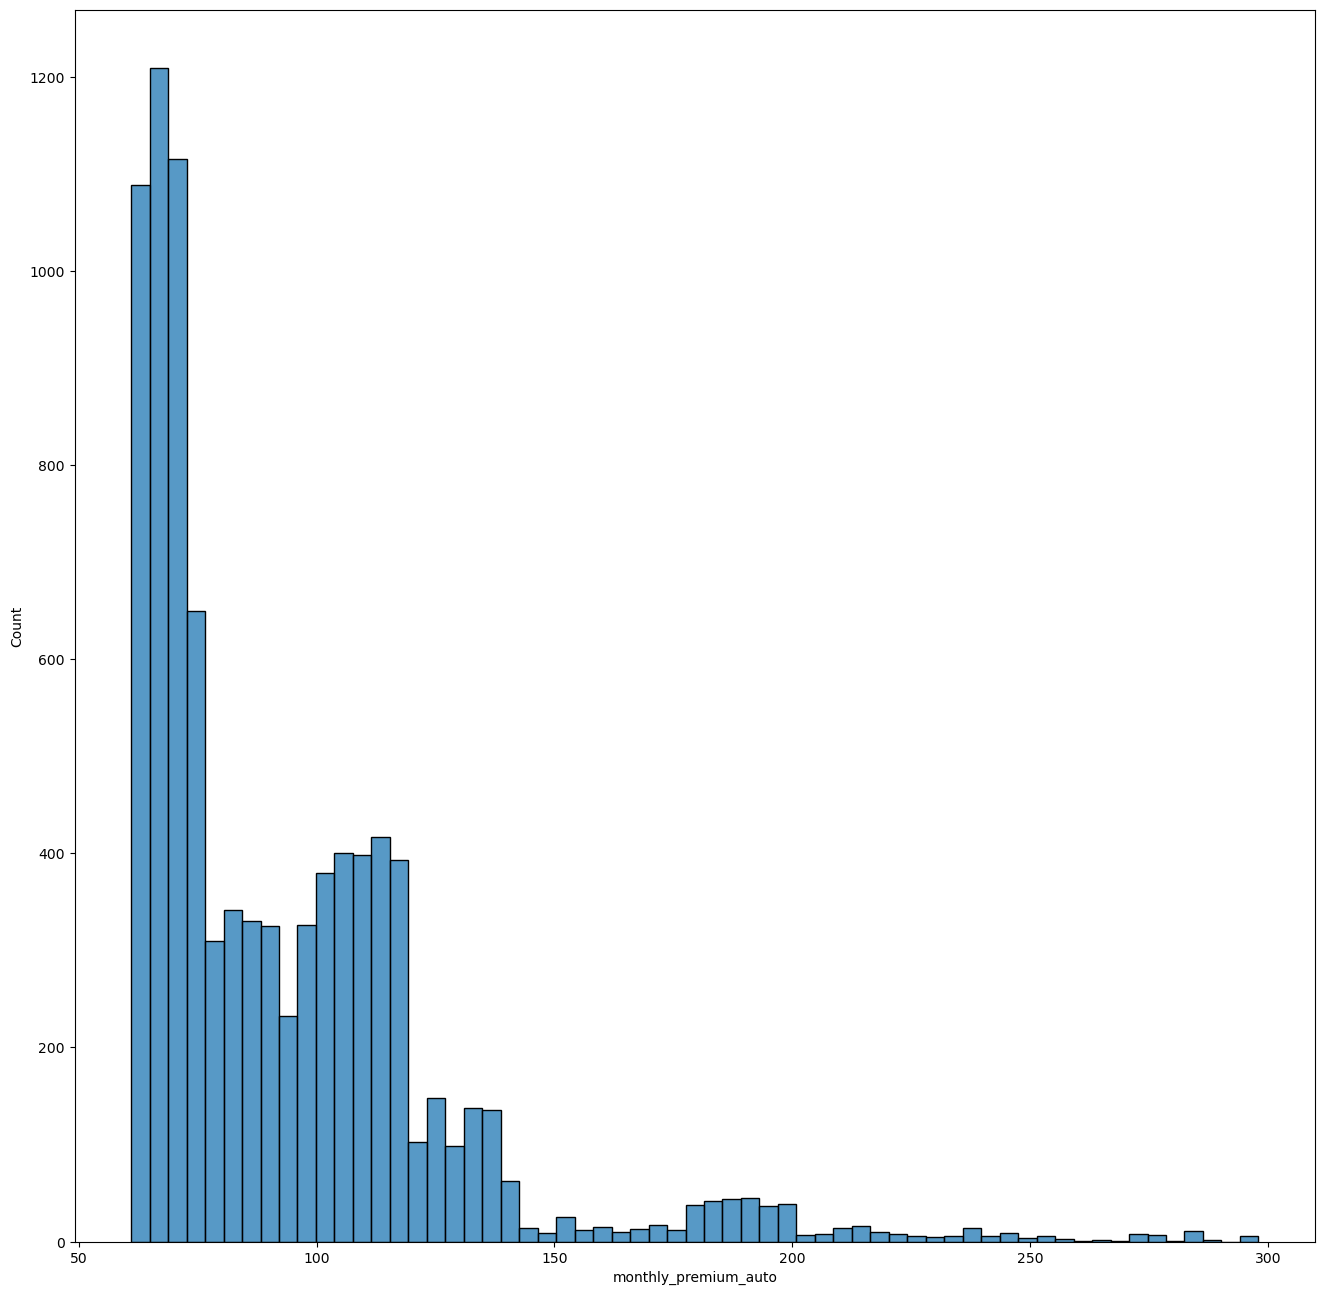

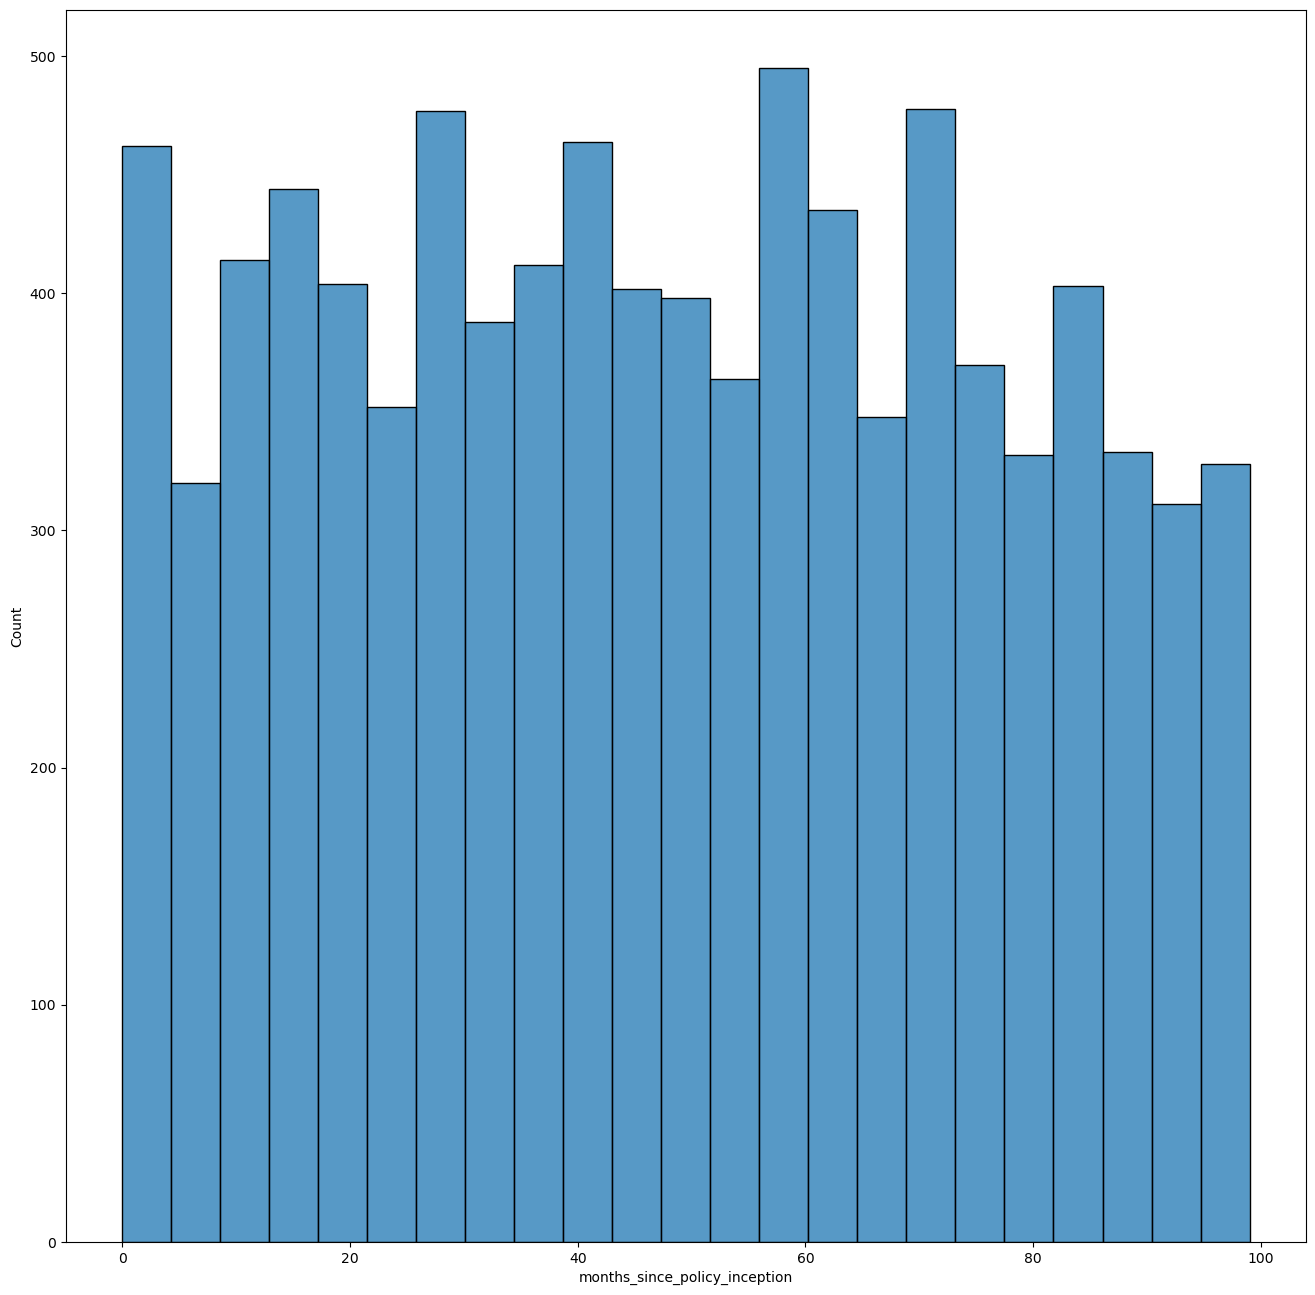

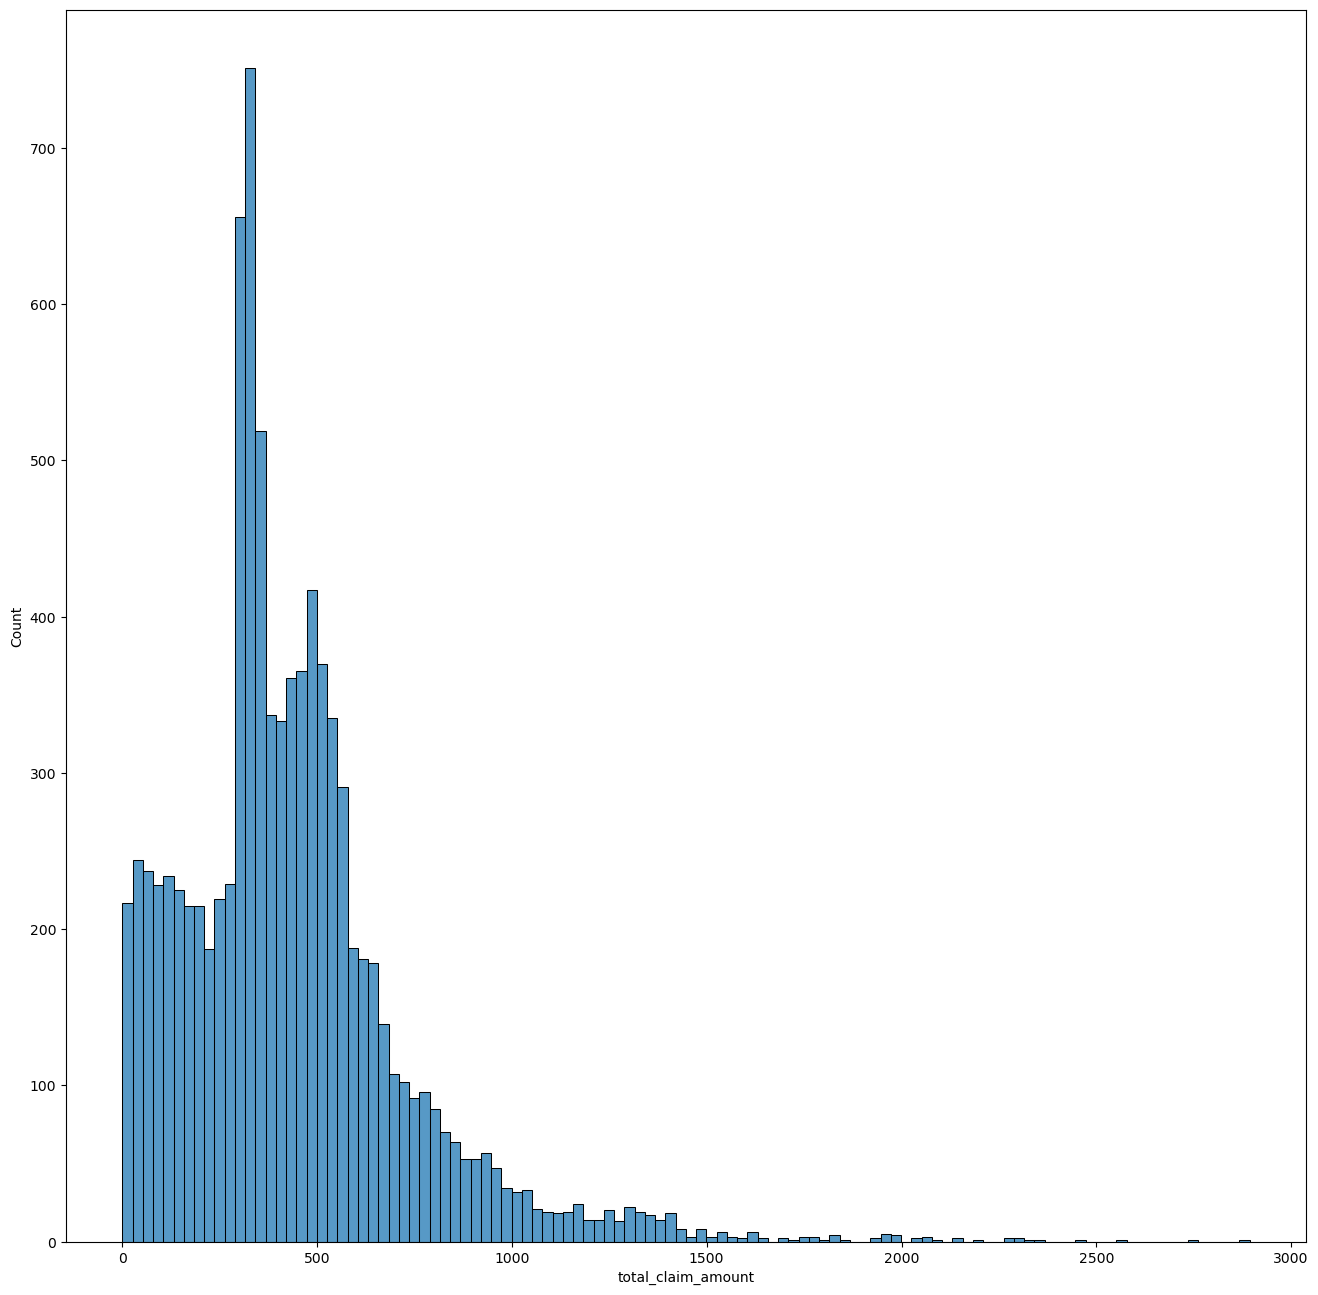

In [21]:
for column in continuous_df.columns:
    fig, (ax_hist) = plt.subplots(1, sharey=True, sharex=True, figsize=(16,16)) 
    sns.histplot(data=continuous_df, x=column, ax = ax_hist)
    plt.show()

**13.- According to the previous histogram plots, do you think that you will have to apply any transformation?**

All the columns has a clear right skew, positive.
So it would be a good idea to apply a transformation to detect and eliminate outliers.

    Z-score, IQR, 

**14.- Look for outliers in the continuous variables that you have found.**

**Hint: There was a good plot to do that.** 

**Define a function to create this kind of plot for the continuous_df.**

In [22]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

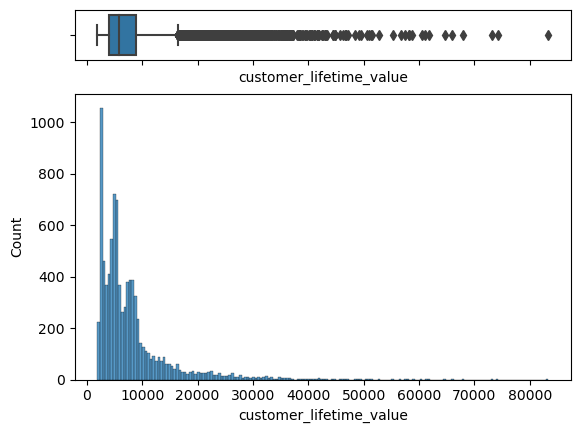

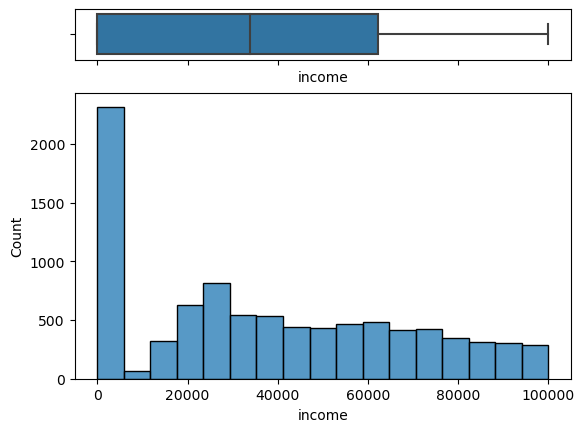

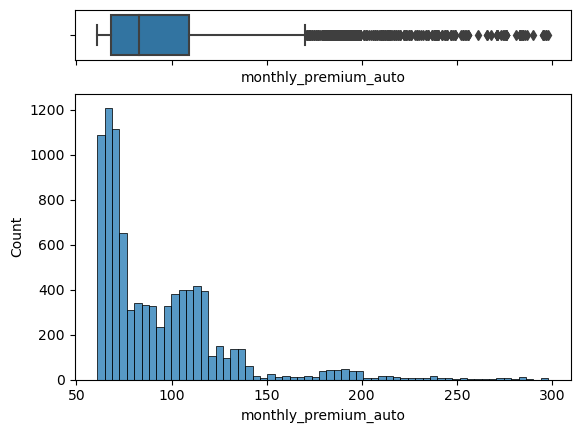

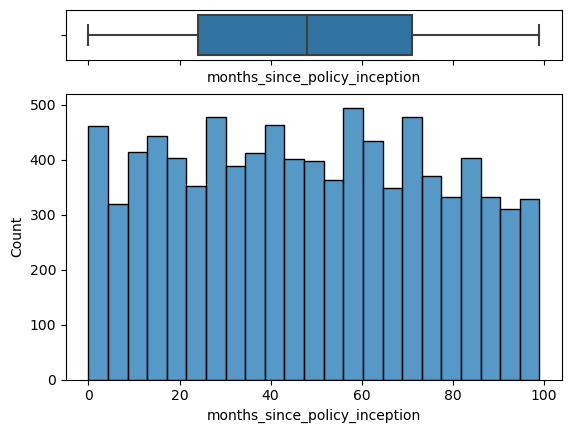

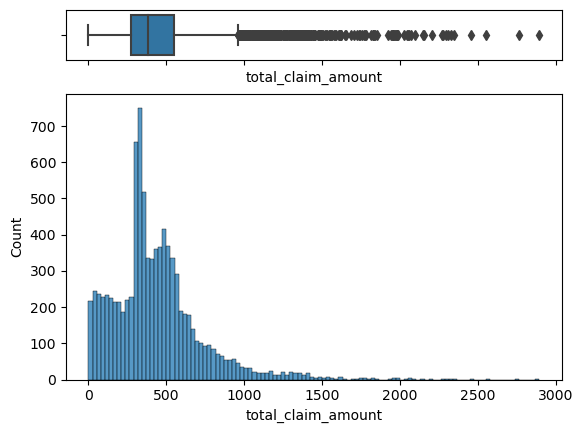

In [23]:
selected_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']

for column in selected_columns:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) #create a plot where we overload top/bottom of the hist + sharex=True + size of the boxplots smaller than the histogram
    sns.boxplot(data=continuous_df, x=column, ax=ax_box)
    sns.histplot(data=continuous_df, x=column, ax=ax_hist)
    plt.show()

______

# Lab_Cleaning categorical data

**1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column.** 

**Make sure to sort the bars by frequency ie: the most frequent values should be placed first.**

**Hint: use .value_counts().**

**In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.**

In [24]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [25]:
categoricals.value_counts()

customer  state       response  coverage  education             employmentstatus  gender  location_code  marital_status  policy_type     policy        renew_offer_type  sales_channel  vehicle_class  vehicle_size
AA10041   California  No        Basic     High School or Below  Unemployed        M       Suburban       Single          Personal Auto   Personal L3   Offer1            Call Center    SUV            Medsize         1
RL28880   Nevada      No        Basic     Bachelor              Employed          F       Suburban       Divorced        Personal Auto   Personal L3   Offer1            Branch         Two-Door Car   Medsize         1
RK63095   California  No        Extended  College               Employed          M       Suburban       Single          Personal Auto   Personal L3   Offer2            Web            Two-Door Car   Medsize         1
RK76184   Arizona     No        Basic     College               Unemployed        M       Suburban       Married         Personal Auto   

In [26]:
def plot_categorical_col(df):
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_cols.append(col)
    value_counts = {}
    for col in categorical_cols:
        value_counts[col] = df[col].value_counts()
        value_counts[col] = value_counts[col].sort_values(ascending=False)
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        if len(value_counts[col]) >= 6:
            sns.countplot(y=col, data=df, order=value_counts[col].index)
        else:
            sns.countplot(x=col, data=df, order=value_counts[col].index)
        plt.title(f'{col} Distribution')
        plt.show()

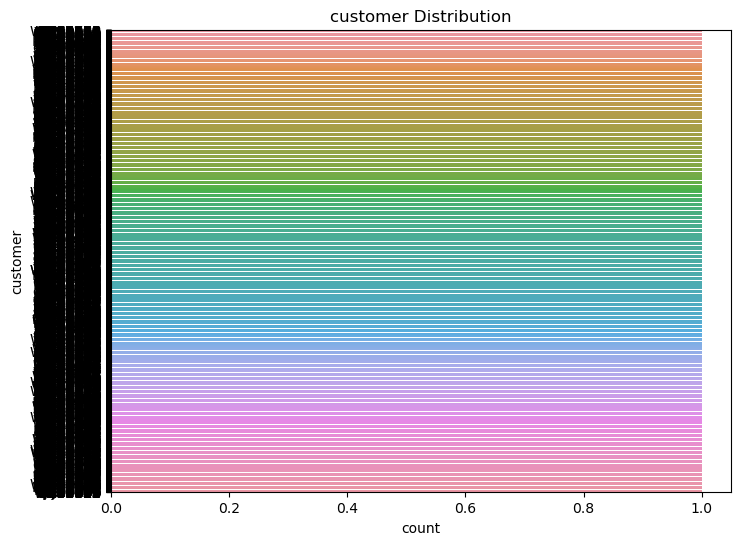

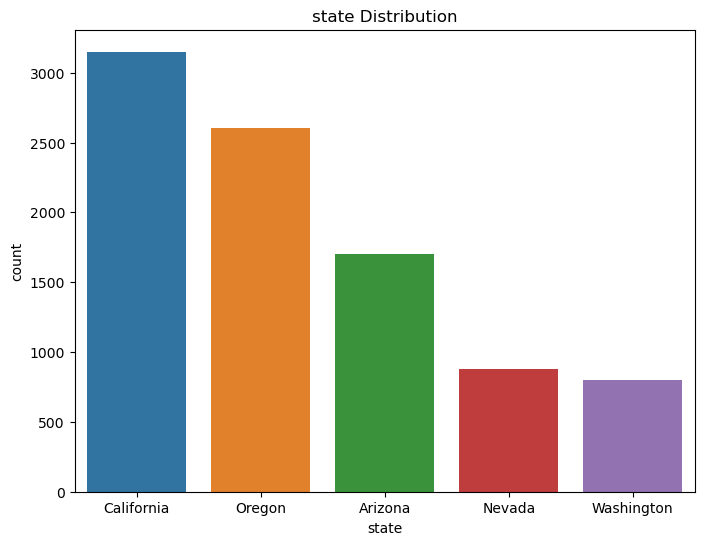

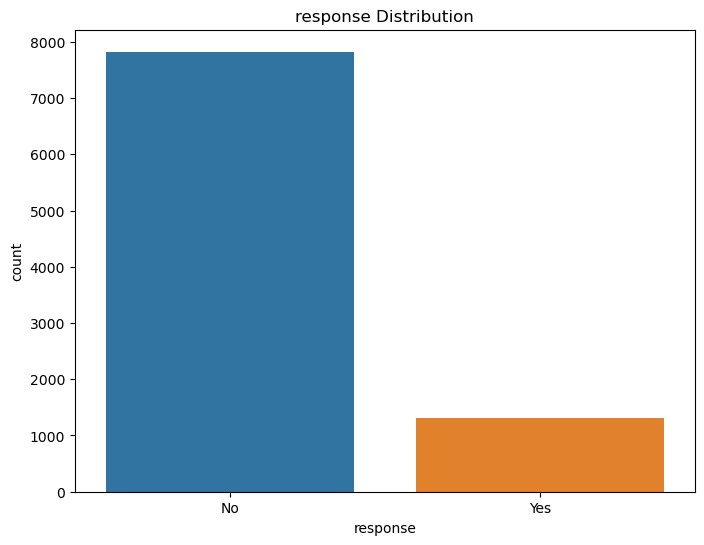

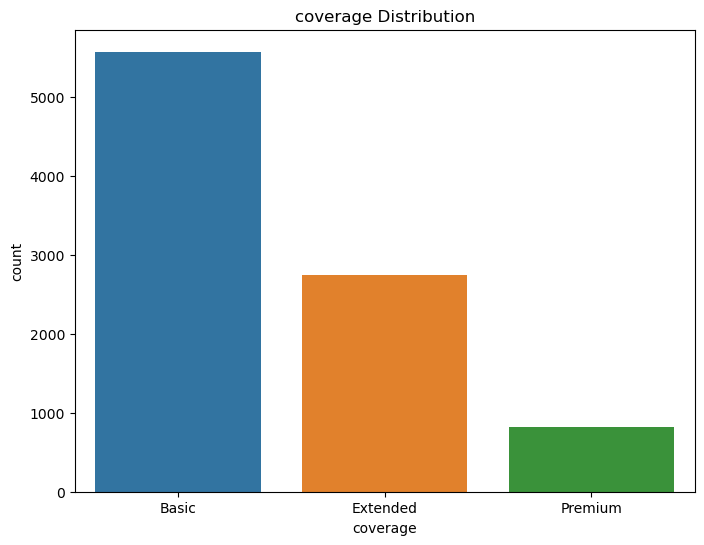

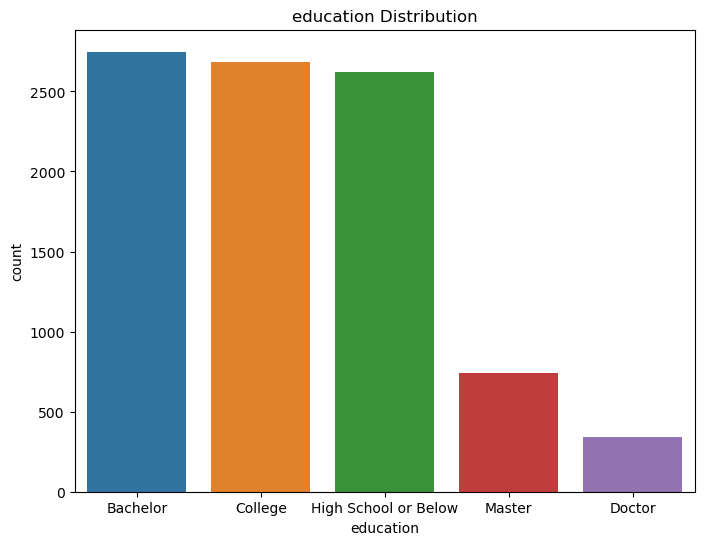

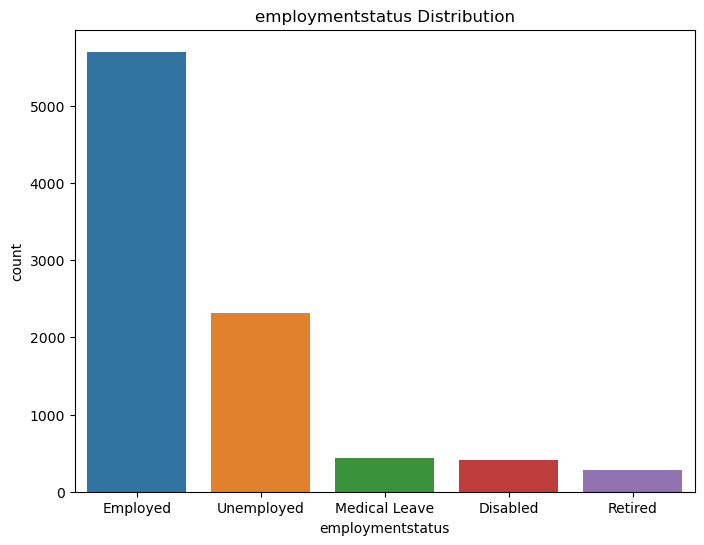

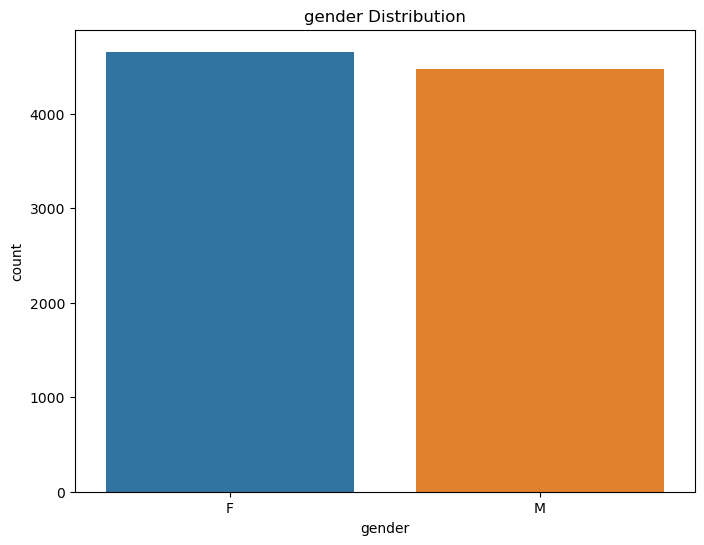

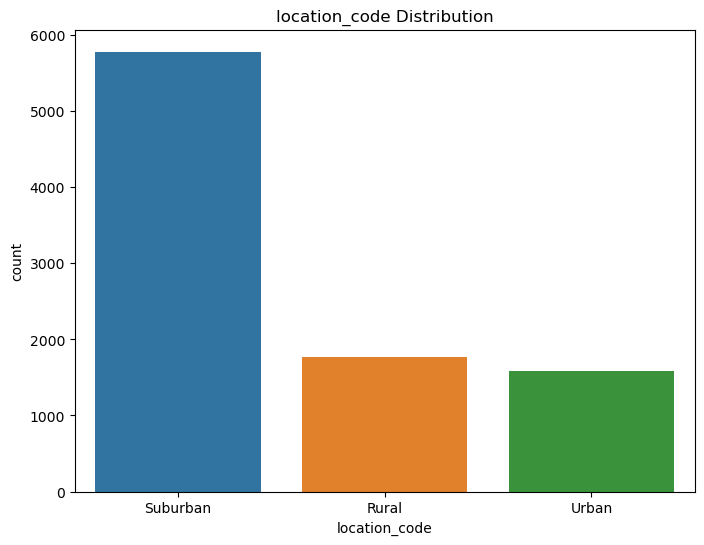

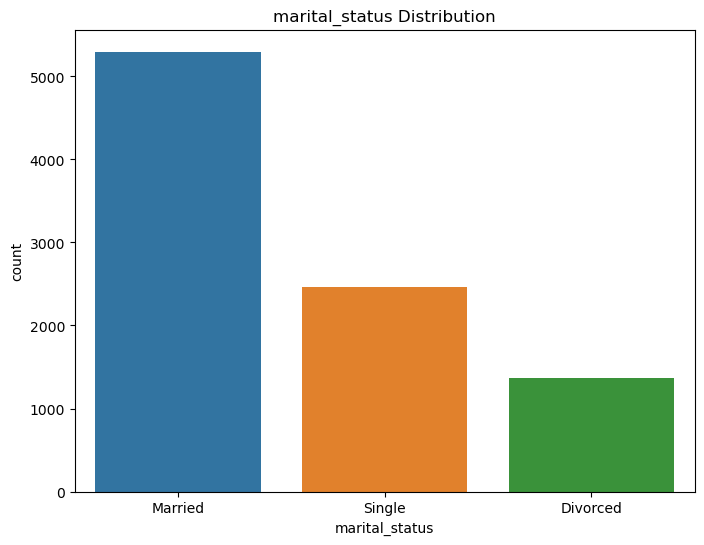

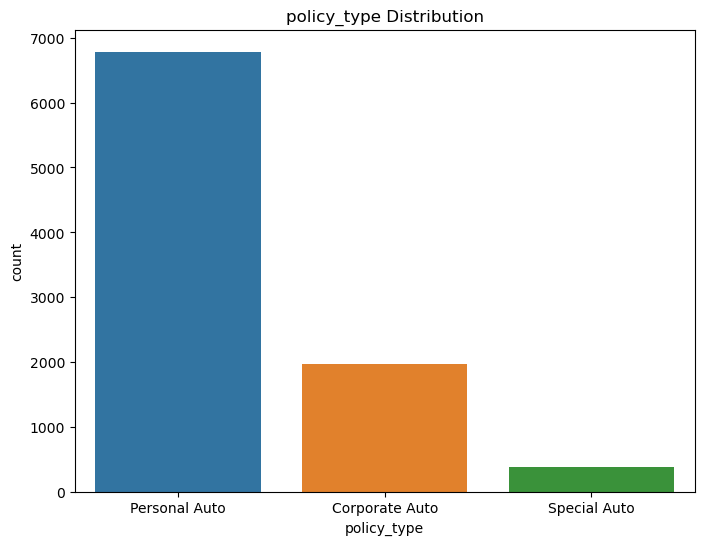

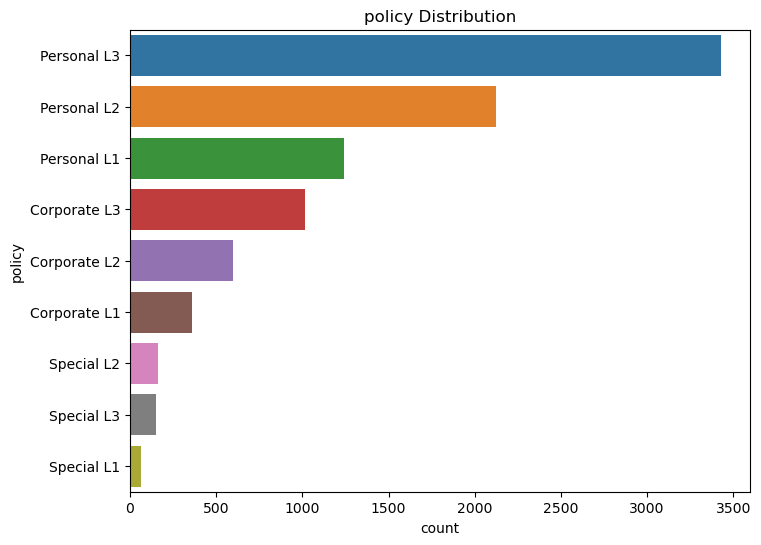

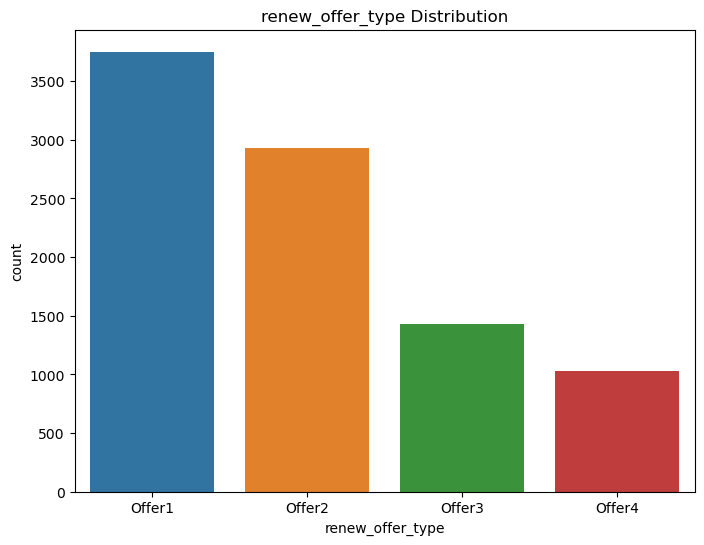

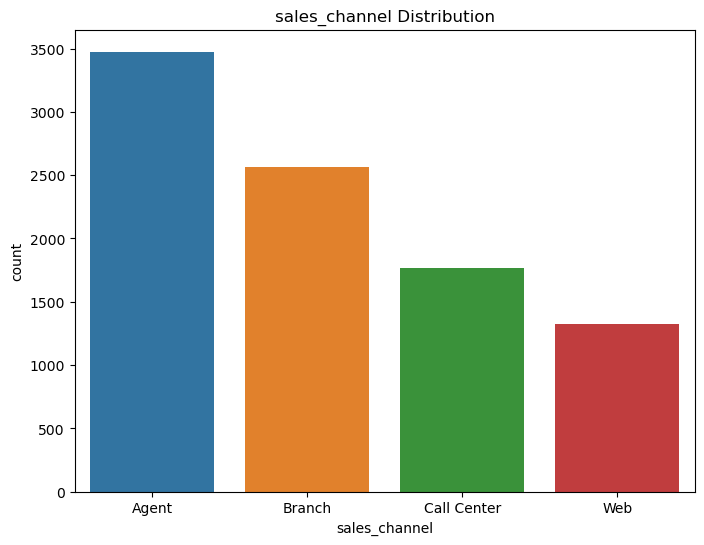

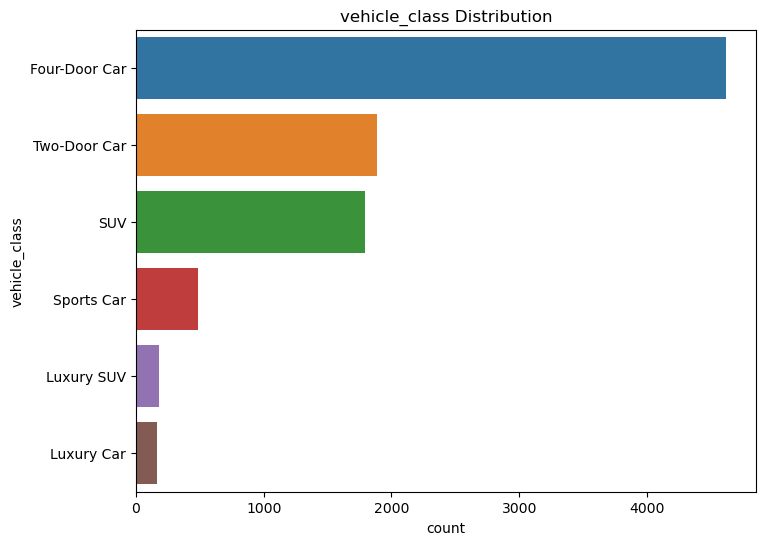

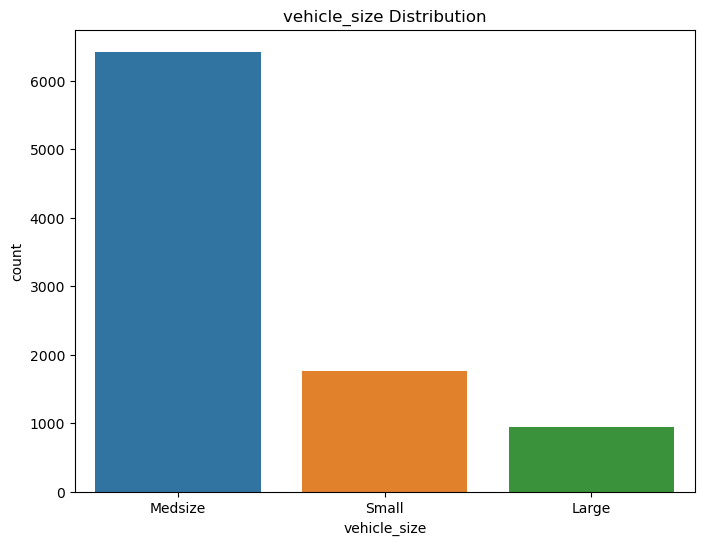

In [27]:
plot_categorical_col(categoricals)

**2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe.** 

**Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.**

In [28]:
categoricals.head(1)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [29]:
categoricals["policy_type"].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [30]:
categoricals["policy"].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [31]:
categoricals1 = categoricals.copy()
categoricals1.drop(['policy_type'], axis=1)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [32]:
# replace values
"""['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3']"""

categoricals1['policy'].replace('Corporate L3', 'L3', inplace=True)
categoricals1['policy'].replace('Personal L3', 'L3', inplace=True)
categoricals1['policy'].replace('Special L3', 'L3', inplace=True)
categoricals1['policy'].replace('Corporate L2', 'L2', inplace=True)
categoricals1['policy'].replace('Personal L2', 'L2', inplace=True)
categoricals1['policy'].replace('Special L2', 'L2', inplace=True)
categoricals1['policy'].replace('Corporate L1', 'L1', inplace=True)
categoricals1['policy'].replace('Personal L1', 'L1', inplace=True)
categoricals1['policy'].replace('Special L1', 'L1', inplace=True)

In [33]:
categoricals1['policy'].value_counts(dropna=False)

policy
L3    4588
L2    2881
L1    1665
Name: count, dtype: int64

In [34]:
categoricals1['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

**3. Time dependency analysis.** 

**Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)**

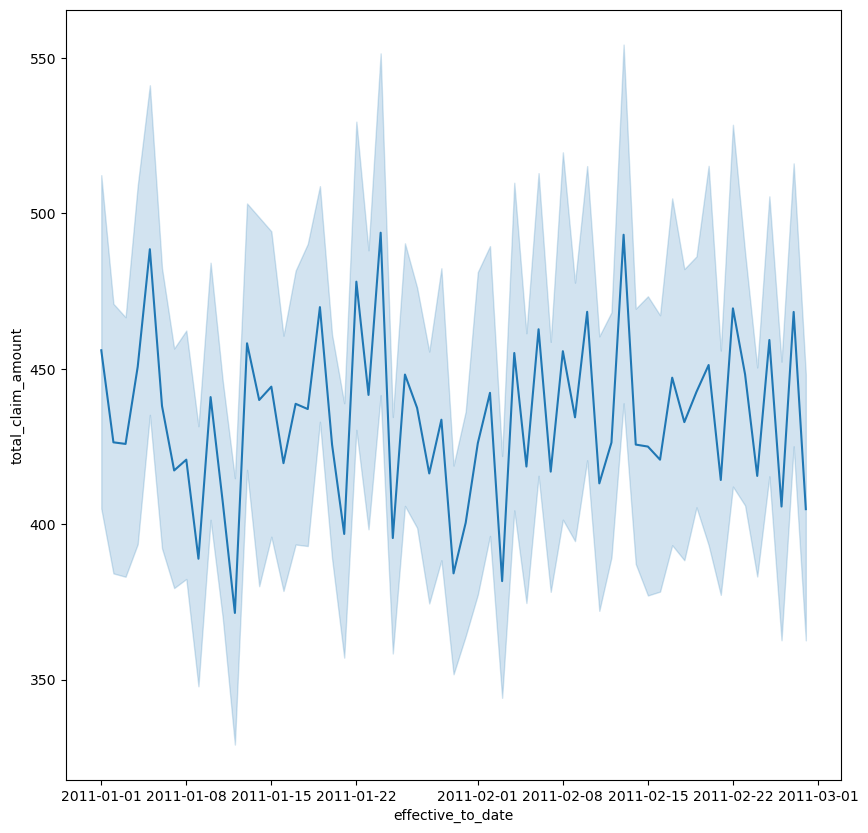

In [35]:

plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.show()

**4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:**
    
- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount

In [36]:
# Create a dataframe using datetime
import pandas as pd
import datetime

# Create a new DataFrame with the required columns
dates_df = pd.DataFrame(columns=['day', 'day_name', 'week', 'month', 'total_claim_amount'])
 
# append columns to the new DataFrame
dates_df['day'] = customer_df['effective_to_date'].dt.day
dates_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
dates_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
dates_df['month'] = customer_df['effective_to_date'].dt.month_name()
dates_df['total_claim_amount'] = customer_df['total_claim_amount']

In [37]:
#show df
dates_df.head(100)

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
95,24,Thursday,8,February,492.127532
96,15,Tuesday,7,February,132.588288
97,16,Wednesday,7,February,297.600000
98,22,Saturday,3,January,269.905129


**5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)**

In [38]:
total_target = dates_df.groupby('day_name')['total_claim_amount'].sum().round(2)
print(total_target)

day_name
Friday       533658.79
Monday       655689.71
Saturday     608060.10
Sunday       581655.66
Thursday     541820.80
Tuesday      502518.93
Wednesday    541563.05
Name: total_claim_amount, dtype: float64


In [39]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_target = total_target.reindex(index=list_of_correct_days)
total_target

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

**6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?**

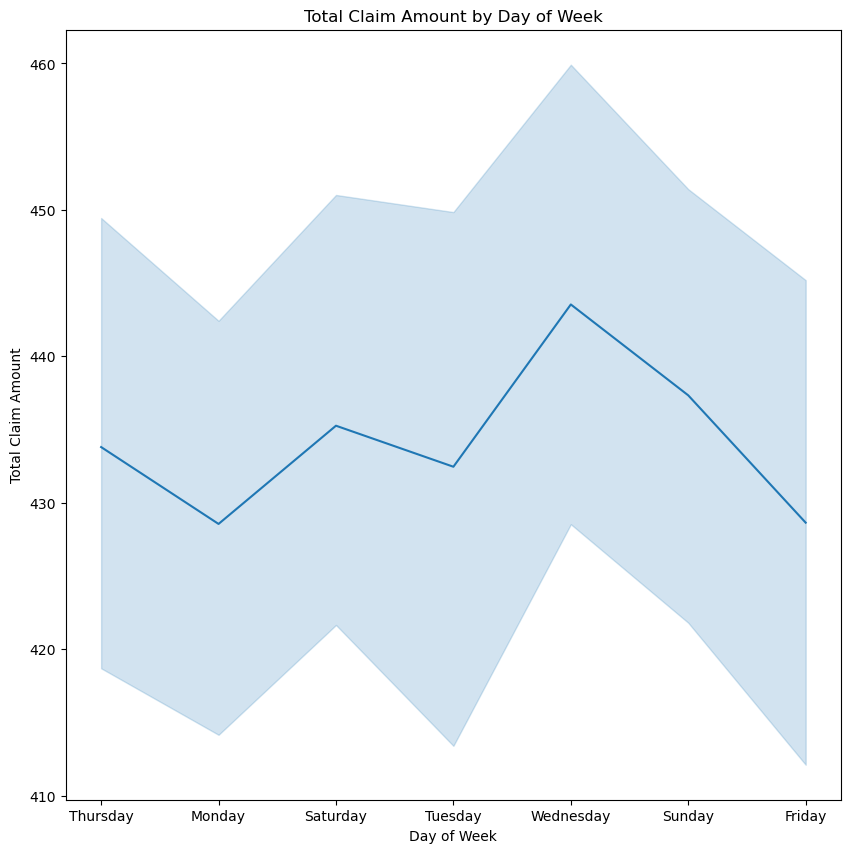

In [40]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=dates_df, x="day_name", y="total_claim_amount")
plt.title("Total Claim Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Claim Amount")
plt.show()

The representation is more regular

**7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)**

In [41]:
num_claims_by_day = dates_df.groupby('day_name')['total_claim_amount'].count().round(2).reindex(index=list_of_correct_days)
print(num_claims_by_day)

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64


**8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()**

In [42]:
median_target_day = dates_df.groupby('day_name')['total_claim_amount'].median().round(2).sort_values(ascending=False)
median_target_day

day_name
Thursday     395.33
Wednesday    392.24
Monday       385.74
Sunday       383.72
Saturday     379.20
Tuesday      378.49
Friday       371.80
Name: total_claim_amount, dtype: float64

In [43]:
median_target_day.to_frame()

,total_claim_amount
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


**9. Plot the median "target" by day of the week name using a seaborn barplot**

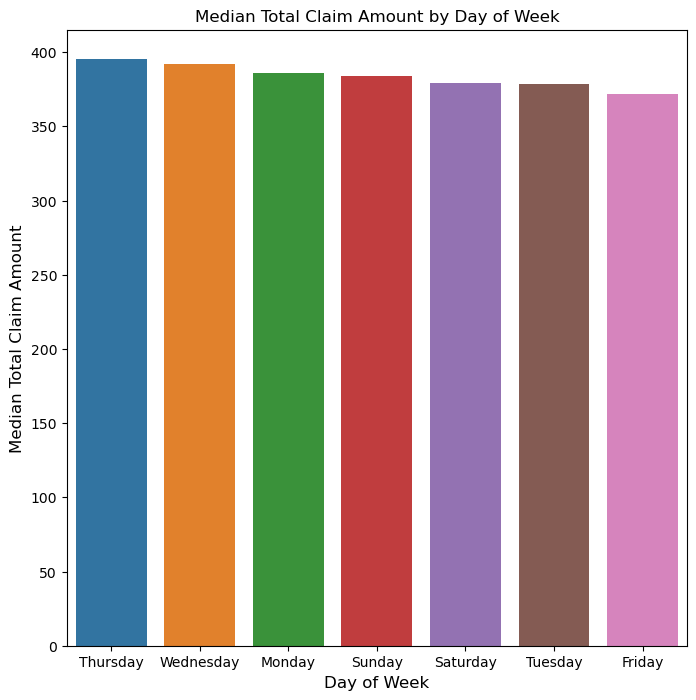

In [44]:


# Create a bar plot using seaborn

plt.figure(figsize=(8,8))
sns.barplot(x=median_target_day.index, y=median_target_day)
plt.title('Median Total Claim Amount by Day of Week', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Median Total Claim Amount', fontsize=12)
plt.show()

**10. What can you conclude from this analysis?**

**11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)**

In [50]:
total_target_month = dates_df.groupby('month')['total_claim_amount'].sum().round(2)
total_target_month

month
February    1847824.19
January     2117142.86
Name: total_claim_amount, dtype: float64

In [51]:
list_correct_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_target_month = total_target_month.reindex(index=list_correct_month_order)
total_target_month

month
January      2117142.86
February     1847824.19
March               NaN
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: total_claim_amount, dtype: float64

**12. Can you do a monthly analysis given the output of the previous series? Why?**

**13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).**

In [52]:
def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

**14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.**


In [53]:
def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

continuous_clean_df = remove_outliers(continuous_df)

**15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.**

In [56]:
# concatenate the dataframes
concat_df = pd.concat([continuous_clean_df, discrete_df, categoricals, dates_df['week']], axis=1)

# drop the NaN values and reset the index
concat_df = concat_df.dropna().reset_index(drop=True)

In [57]:
concat_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'customer', 'state', 'response', 'coverage',
       'education', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'week'],
      dtype='object')

**16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.**

In [58]:
concat_df = concat_df.reindex(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_policy_inception', 'months_since_last_claim', 
                         'number_of_open_complaints', 'number_of_policies', 'state',
                         'response', 'coverage', 'education', 'employmentstatus', 'gender',
                         'location_code', 'marital_status', 'policy', 'renew_offer_type',
                         'sales_channel', 'vehicle_class', 'vehicle_size', 'week', 
                         'total_claim_amount'])

**17. Turn the response column values into (Yes=1/No=0).**

In [59]:
concat_df['response'] = concat_df['response'].replace({'Yes': 1, 'No': 0})

In [60]:
print(concat_df["response"].unique())

[0 1]


**18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.**

In [61]:
# Creating a dictionary to map all values to new categories
dict_education = {"Master": "Graduate", "Doctor": "Graduate"}

# replace the values using the dictionary
concat_df["education"] = concat_df["education"].replace(dict_education)

In [62]:
print(concat_df["education"].unique())

['Bachelor' 'College' 'Graduate' 'High School or Below']


**19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.**

In [63]:
# replace the values

concat_df['employmentstatus'].replace(["Medical Leave", "Disabled", "Retired"], "Inactive", inplace=True)

In [64]:
print(concat_df["employmentstatus"].unique())

['Employed' 'Unemployed' 'Inactive']


**20. Deal with column Gender turning the values into (1/0).**

In [65]:
print(concat_df["gender"].unique())

['F' 'M']


In [66]:
concat_df['gender'] = concat_df['gender'].replace({'F': 1, 'M': 0})

In [67]:
print(concat_df["gender"].unique())

[1 0]


**21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.**

In [68]:
print(concat_df["vehicle_class"].unique())

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [69]:
concat_df['vehicle_class'].replace(["Sports Car", "Luxury SUV", "Luxury Car"], "Luxury ", inplace=True)

In [70]:
print(concat_df["vehicle_class"].unique())

['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury ']


**22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".**

In [71]:
coverage_list = {
    'Premium': 3,
    'Extended': 2,
    'Basic': 1
}

concat_df['coverage'] = concat_df['coverage'].replace(coverage_list)

In [72]:
print(concat_df["coverage"].unique())

[1 2 3]


**23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".**

In [73]:
employment_list = {
    'Employed': 3,
    'Inactive': 2,
    'Unemployed': 1
}

concat_df['employmentstatus'] = concat_df['employmentstatus'].replace(employment_list)

In [74]:
print(concat_df["employmentstatus"].unique())

[3 1 2]


**24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".**

In [75]:
location_code_list = {
    'Urban': 3,
    'Suburban': 2,
    'Rural': 1
}

concat_df['location_code'] = concat_df['location_code'].replace(location_code_list)

In [76]:
print(concat_df["location_code"].unique())

[2 1 3]


**25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".**

In [77]:
vehicle_size_list = {
    'Large': 3,
    'Medsize': 2,
    'Small': 1
}

concat_df['vehicle_size'] = concat_df['vehicle_size'].replace(vehicle_size_list)

In [78]:
print(concat_df["vehicle_size"].unique())

[2 1 3]


**26. Get a dataframe with the categorical nominal columns**

In [81]:
# Identify the categorical nominal columns
categorical_nominal_cols = []
for col in concat_df.columns:
    if concat_df[col].dtype == object and concat_df[col].nunique() < 10:
        categorical_nominal_cols.append(col)

# Create a new dataframe with the categorical nominal columns
categorical_nominal_df = concat_df[categorical_nominal_cols]

In [83]:
# Create a new dataframe with the categorical nominal columns
categorical_nominal_df = concat_df[categorical_nominal_cols]

**27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:**

**    levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]    **

In [84]:
categorical_nominal_df.columns

Index(['state', 'education', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class'],
      dtype='object')

In [86]:
# create a list of the categorical nominal columns
categorical_nominal_cols = ['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']

# create a list of named levels
levels = []

# For loop through each categorical nominal column to get its unique values
for col in categorical_nominal_cols:
    unique_vals = concat_df[col].unique()
    levels.append(list(unique_vals))

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], [1, 2, 3], ['Bachelor', 'College', 'Graduate', 'High School or Below'], [3, 1, 2], [1, 0], [2, 1, 3], ['Married', 'Single', 'Divorced'], ['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1', 'Special L2', 'Corporate L1', 'Personal L2', 'Special L1', 'Special L3'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury '], [2, 1, 3]]


**28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Encoded function:

encoder = OneHotEncoder(drop='first', categories=levels) 

_____

# Lab_Comparing regression models

**1. Define X and y**

**2. Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31**

**3. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)**

**4. Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat**

**5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df**

**6. Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new**

**7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df**

**8. Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets**

**9. Create a function that given a model prediction and real values returns a pandas dataframe with the following table:**

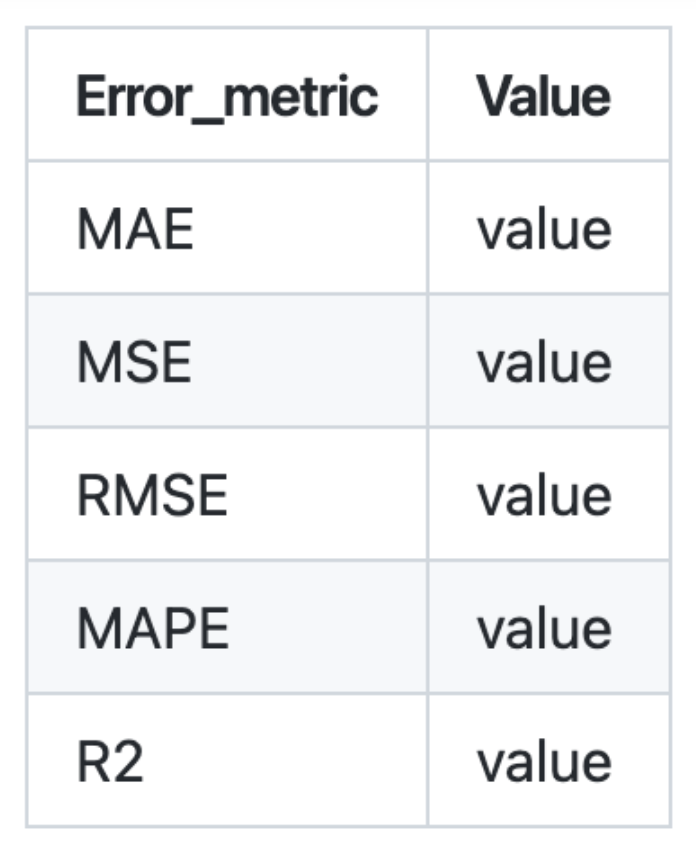

**10. Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets**

**11. Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.**

**12. Use the function to train the following models (with default settings):**

In [ ]:
*LinearRegressor

*KNeighborsRegressor

*MLPRegressor

**15. Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?**